# Predicting China Scholarship additional cost and the amount to spend on Accomodation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as pe #you might need to pip install cufflinks
import plotly.offline as po
import cufflinks as cl
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We are going to read the csv file using read_csv() function 
initial_data = pd.read_csv('original.csv')

In [3]:
initial_data.head()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


To have a perfect model, we decided to add more information to the dataset

In [4]:
# We are going to read the csv file using read_excel() function 
data = pd.read_excel('china_scholarship.xls')  #might also need to pip install xlrd
#data is our upgraded dataset

In [5]:
data.head()

,schol_id,University,Major,Location / District,Province / City,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Xuhui,Shanghai,Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750,MONTH,1000,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Qingdao,Shandong,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0,YEAR,0,MONTH


In [6]:
initial_data.columns

Index(['schol_id', 'University', 'Major', 'Level', 'Language',
       'Tuition Covered', 'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [7]:
data.columns

Index(['schol_id', 'University', 'Major', 'Location / District',
       'Province / City', 'Level', 'Language', 'Tuition Covered',
       'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [8]:
# We are going to rename the columns using the snake_case naming convention to improve readability
data.columns = ['school_id', 'university', 'major', 'district', 'city', 'level', 'language', 'tuition_covered', 'accomodation_covered',
'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee','start_month','start_year', 'accomodation_to_pay',
'accomodation_duration', 'expense_to_pay', 'expense_duration']

In [9]:
# Let us view an intuitive summary of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school_id               3576 non-null   int64  
 1   university              3576 non-null   object 
 2   major                   3576 non-null   object 
 3   district                3576 non-null   object 
 4   city                    3576 non-null   object 
 5   level                   3576 non-null   object 
 6   language                3576 non-null   object 
 7   tuition_covered         3453 non-null   float64
 8   accomodation_covered    3576 non-null   int64  
 9   living_expense_covered  3576 non-null   int64  
 10  tuition_fees_to_pay     3576 non-null   int64  
 11  original_tuition_fee    3453 non-null   float64
 12  start_month             3576 non-null   object 
 13  start_year              3576 non-null   int64  
 14  accomodation_to_pay     3576 non-null   

In [10]:
# Now let us see a preview of the data by looking at the first 5 rows 
data.head()

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Xuhui,Shanghai,Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750,MONTH,1000,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Qingdao,Shandong,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0,YEAR,0,MONTH


In [11]:
# Let us also look at the last 5 rows of the dataframe
data.tail()

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3575,3605,East China University of Science and Technology,Sociology of Law,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH


In [12]:
# Let us see how many null values present in the columns 
data.isna().sum()

school_id                   0
university                  0
major                       0
district                    0
city                        0
level                       0
language                    0
tuition_covered           123
accomodation_covered        0
living_expense_covered      0
tuition_fees_to_pay         0
original_tuition_fee      123
start_month                 0
start_year                  0
accomodation_to_pay         0
accomodation_duration       0
expense_to_pay              0
expense_duration            0
dtype: int64

In [13]:
# Let us view the descriptive statistics of the dataframe. Note that this can only be applied to numerical values 
data[['tuition_covered', 'tuition_fees_to_pay', 'original_tuition_fee', 'accomodation_to_pay', 'expense_to_pay']].describe().T

,count,mean,std,min,25%,50%,75%,max
tuition_covered,3453.0,20531.704315,12428.124918,0.0,10625.0,20000.0,26500.0,80000.0
tuition_fees_to_pay,3576.0,8433.516499,9519.340675,0.0,0.0,6000.0,11000.0,69000.0
original_tuition_fee,3453.0,28693.955980,15341.450293,0.0,20000.0,26500.0,34000.0,148000.0
accomodation_to_pay,3576.0,1376.461969,2802.526970,0.0,400.0,900.0,1200.0,24000.0
expense_to_pay,3576.0,1070.987136,601.297528,0.0,1000.0,1000.0,1500.0,2700.0


## Data Visualization

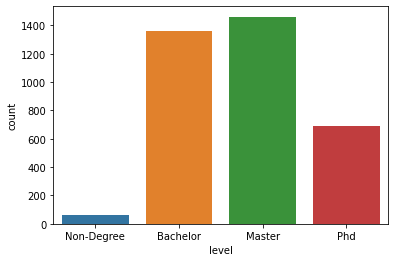

In [16]:
sns.countplot(x = data['level'])

More people apply for master level

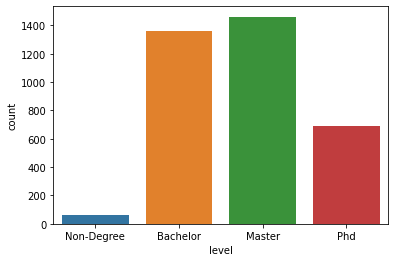

In [36]:
sns.countplot(x = data['level'])

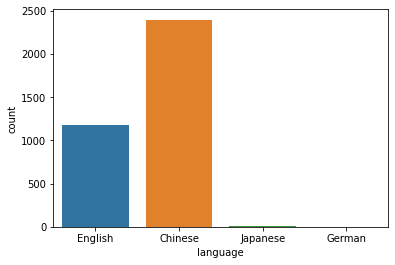

In [26]:
sns.countplot(x = data['language'])

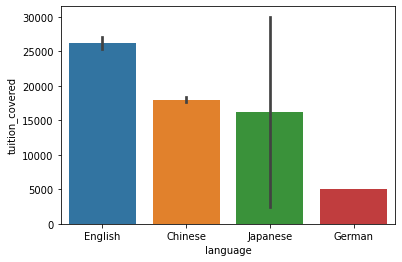

In [34]:
#the tuition covered depends on the language spoken too
sns.barplot(data= data, x = 'language', y = 'tuition_covered')
plt.show()

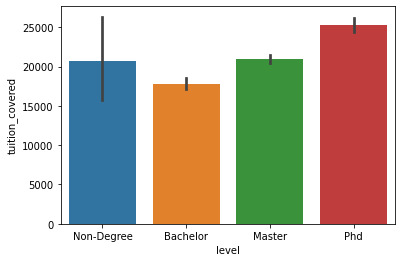

In [35]:
#relationship between tuition covered and level
ax = sns.barplot(data=  data, y = 'tuition_covered', x= 'level')


**In the charts above, its shows that**
*   more people speak chinese
*   the english speaking schools cover more tuition fees than the schools who speak other languages.
* and lastly, the tuition covered for Phd students is more than other levels although most of the scholarships offered are for bachelors and masters level.





## Data Preprocessing for model 1(Predicting tuition_fees_to_pay)

In [ ]:
# Notice that the min values for all the selected columns are 0
# Let us see how many 'O' values these columns have 

print(len(data[data['tuition_covered'] == 0]))
print(len(data[data['tuition_fees_to_pay'] == 0]))
print(len(data[data['original_tuition_fee'] == 0]))
print(len(data[data['accomodation_to_pay'] == 0]))
print(len(data[data['expense_to_pay'] == 0]))

In [ ]:
# Let us define the predictor columns and the target column 
# X is the predictor
# y is the target variable
X = data.drop(['tuition_fees_to_pay'], axis = 1)
y = data['tuition_fees_to_pay']

In [ ]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols = list(X.select_dtypes(include = 'object').columns)
num_cols = list(X.select_dtypes(exclude = 'object').columns)
print(obj_cols)
print(num_cols)

In [ ]:
# Now we are going to fill the empty points with mean of the values in the column 
null = ['tuition_covered', 'original_tuition_fee']
for col in null:
    X[col] = X[col].fillna(X[col].mean())
X.isna().sum()

In [ ]:
X.info()

In [ ]:
X['accomodation_duration'].unique()

The Accomodation duration column has an integer "-1". To successfully encode the all the categorical values in the dataset, we must change the -1 integer to an object too

In [ ]:
X1 = X
maap = {'MONTH': 'MONTH', 'YEAR': 'YEAR', 'TERM': 'TERM', 'DAY': 'DAY', -1: '-1', 'SEMESTER': 'SEMESTER'}
X1['accomodation_duration'] = X1['accomodation_duration'].map(maap)

In [ ]:
# Let us use the LabelEncoder for the columns that are objects
X1 = X.copy().drop(['school_id'], axis = 1)
for col in obj_cols:
    le = LabelEncoder()
    X1[col] = le.fit_transform(X1[col])
X1.head()

In [ ]:
# Let us see what our target looks like visually after a log transformation
sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [ ]:
# We are splitting the test and train dataset we will do it for the normal values 
# and the transformed values 
xtrain, xtest, ytrain, ytest = train_test_split(X1, y)
xtrain_t, xtest_t, ytrain_t, ytest_t = train_test_split(X1, y_transformed)

## Training model 1(Predicting tuition_fees_to_pay)

In [ ]:
# Let us import RandomForestRegressor to fit our data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf1 = RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf1.fit(xtrain_t, ytrain_t)

In [ ]:
# Let us validate our model
val = rf.predict(xtest)
val2 = np.expm1(rf1.predict(xtest_t))
print('Mae Normal -', mean_absolute_error(val, ytest))
print('Mae trans -', mean_absolute_error(val2, np.expm1(ytest_t)))

APPLYING SCALER TO SEE IF IT IMPROVES ACCURACY AND REDUCES MAE

In [ ]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X1)
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X2, y)
xtrain_t1, xtest_t1, ytrain_t1, ytest_t1 = train_test_split(X2, y_transformed)

In [ ]:
rf2 = RandomForestRegressor()
rf3 = RandomForestRegressor()
rf2.fit(xtrain1, ytrain1)
rf3.fit(xtrain_t1, ytrain_t1)

In [ ]:
val3 = rf2.predict(xtest1)
val4 = np.expm1(rf3.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val3, ytest1))
print('Mae trans -', mean_absolute_error(val4, np.expm1(ytest_t1)))

USING DUMMIES TO SEE IF IT IMPROVES ACCURACY ALSO

In [ ]:
dummy_X = pd.get_dummies(X1, columns = obj_cols)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y)
xtrain_t2, xtest_t2, ytrain_t2, ytest_t2 = train_test_split(X2, y_transformed)

In [ ]:
rf4 = RandomForestRegressor()
rf5 = RandomForestRegressor()
rf4.fit(xtrain2, ytrain2)
rf5.fit(xtrain_t2, ytrain_t2)

In [ ]:
val5 = rf4.predict(xtest)
val6 = np.expm1(rf5.predict(xtest_t1))
print('Mae Normal -', mean_absolute_error(val5, ytest1))
print('Mae trans -', mean_absolute_error(val6, np.expm1(ytest_t1)))

In [ ]:
# saving the best model as pickled file for offline batch prediction

import pickle
pickle.dump(rf3, open('model.pkl', 'wb'))

In [ ]:
# reloading model and predicting
model = pickle.load(open('model.pkl','rb'))
predict_val = np.expm1(model.predict(xtest_t1))
print('Mae trans -', mean_absolute_error(predict_val, np.expm1(ytest_t1)))

## Data Preprocessing for model 2 (Predicting )

In [ ]:
# Let us define the predictor columns and the target column 
# X2 is the predictor
# y2 is the target variable
X2 = data.drop(['accomodation_to_pay'], axis = 1)
y2 = data['accomodation_to_pay']

In [ ]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols2 = list(X2.select_dtypes(include = 'object').columns)
num_cols2 = list(X2.select_dtypes(exclude = 'object').columns)
print(obj_cols2)
print(num_cols2)

In [ ]:
# Now we are going to fill the empty points with mean of the values in the column 
null = ['tuition_covered', 'original_tuition_fee']
for col in null:
    X2[col] = X2[col].fillna(X2[col].mean())
X2.isna().sum()

In [ ]:
X2['accomodation_duration'].unique()

The Accomodation duration column has an integer "-1". To successfully encode the all the categorical values in the dataset, we must change the -1 integer to an object too

In [ ]:
X21 = X2
maap = {'MONTH': 'MONTH', 'YEAR': 'YEAR', 'TERM': 'TERM', 'DAY': 'DAY', -1: '-1', 'SEMESTER': 'SEMESTER'}
X21['accomodation_duration'] = X21['accomodation_duration'].map(maap)

In [ ]:
# Let us use the LabelEncoder for the columns that are objects
X21 = X2.drop(['school_id'], axis = 1)
for col in obj_cols2:
    le2 = LabelEncoder()
    X21[col] = le2.fit_transform(X21[col])
X21.head()

In [ ]:
# Let us see what our target looks like visually after a log transformation
sns.set()
y2_transformed = pd.Series(np.log1p(y2))

fig, ax = plt.subplots(1, 2)
sns.distplot(y2, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y2_transformed, ax=ax[1])
plt.show()

In [ ]:
# We are splitting the test and train dataset we will do it for the normal values 
# and the transformed values 
x2train, x2test, y2train, y2test = train_test_split(X21, y2)
x2train_t, x2test_t, y2train_t, y2test_t = train_test_split(X21, y2_transformed)

## Training model 2(Predicting accomodation_to_pay)

In [ ]:
# Let us import RandomForestRegressor to fit our data
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf1 = RandomForestRegressor()
randf.fit(x2train,y2train)
randf1.fit(x2train_t, y2train_t)

In [ ]:
# Let us validate our model
evall = randf.predict(x2test)
eval2 = np.expm1(randf1.predict(x2test_t))
print('Mae Normal -', mean_absolute_error(evall, y2test))
print('Mae trans -', mean_absolute_error(eval2, np.expm1(y2test_t)))